In [1]:
import MySQLdb
import pandas
import matplotlib.pyplot as plt
import math
%matplotlib inline  


In [4]:
#Returns a dictionary of Fixations (startTime, endTime, duration, X, Y, sceName, depth, file) 
#and saccades (startTime, endTime, duration, startX, startY, endX, endY) 
def getSession(self,host,user,passwd,db, session_id):
        db = MySQLdb.connect(host=host,
                         user=user,
                         passwd=passwd,
                         db=db)
        cursor = db.cursor()
        session_info = cursor.execute("SELECT * FROM session_info WHERE session_id='"+session_id+"'")
        self.df = pandas.read_sql("SELECT * FROM (SELECT * FROM gazes JOIN sces ON gazes.gaze_id=sces.sce_gaze_id) a WHERE a.gaze_session_id='" + session_id + "';", db)
        #df has all sces. dfu only has sce of depth 0.
        dfu = df.drop_duplicates(subset="gaze_id")
        #no style, is those views which are not associated with a sce. such as project explorer views.
        #self.dfNoStyle = pandas.read_sql("SELECT * FROM gazes WHERE path IS NULL", db)
        
        # I-VT. let's find some fixations!
        fixation_list = []
        
def getVelocity(x1,y1,x2,y2,t1,t2):
    #Finding distance between the points
    a = abs(x1-x2)
    b = abs(y1-y2)
    dist = math.sqrt(a+b)
    
    #Velocity, as distance/time
    time = t2-t1
    
    velocity = dist/time
    
    return velocity
        
        

def split_by_time(df, startTime=0, endTime=0):
        #print df
        start = df["session_time"].min()/10e9
        if startTime != 0:
            dfTime = df.loc[(df["session_time"]) / 1e9 >= start + startTime]
            if endTime != 0:
                dfTime = dfTime.loc[(dfTime["session_time"]) / 1e9 <= start + endTime]
        else :
            if endTime != 0:
                dfTime = df.loc[(df["session_time"]) / 1e9 <= start + endTime]
                return dfTime
        return df
    
#Show how many times each unique source code entity has been looked at.
def sce_distribution(self,startTime=0, endTime=0,depth=0):

    dfTime = self.split_by_time(self.df, startTime, endTime)
    dfTime = dfTime.loc[dfTime["depth"] <= depth]["sce_name"]
    y = dfTime.value_counts()
    x_ticks = dfTime.to_frame().drop_duplicates(subset="sce_name")["sce_name"]
    x = range(len(x_ticks))

    #print yval
    #print dfTime

    return [x_ticks,y] 


#Get bar plot for time interval in seconds. 
#Ex. sce_distribution_by_time(10,30) is 10 seconds after first gaze, to 30 seconds after first gaze
def sce_distribution_by_time(self,startTime=0,endTime=0,depth=0):
        print "Not yet implemented"
        

def plot_bar(plotData):
    x = range(len(plotData[0]))
    x_ticks = plotData[0]
    y = plotData[1]
    plt.xticks(x, x_ticks, rotation=80)
    plt.bar(x, list(y), color="blue")

    plt.show()

def plot_bar_subplots(plotDatalist):
    length = len(plotDatalist)
    for i in range(0, length):
        plotData = plotDatalist[i]
        plt.subplot(2,(length/2+length%2),i+1)

        x = range(len(plotData[0]))
        x_ticks = plotData[0]
        #print plotData[0]
        y = plotData[1]
        #if i == 6:
        #plt.xticks(x, x_ticks, rotation=80)
        plt.bar(x, list(y), color="blue")
        
        #axarr[i,n%2].bar(plotDatalist[i+n][0],plotDatalist[i+n][1])
    plt.tight_layout()
    plt.show()


In [156]:
#iTrace = ITraceAnalyser("localhost","root","1234","iTrace",'20171020T123558-0047+0200')
#iTrace = ITraceAnalyser("localhost","root","1234","iTrace",'20171023T143107-0434+0200')
#iTrace = ITraceAnalyser("localhost","root","1234","iTrace",'20171023T150625-0853+0200')
iTrace = ITraceAnalyser("localhost","root","1234","iTrace",'20171023T153101-0468+0200')


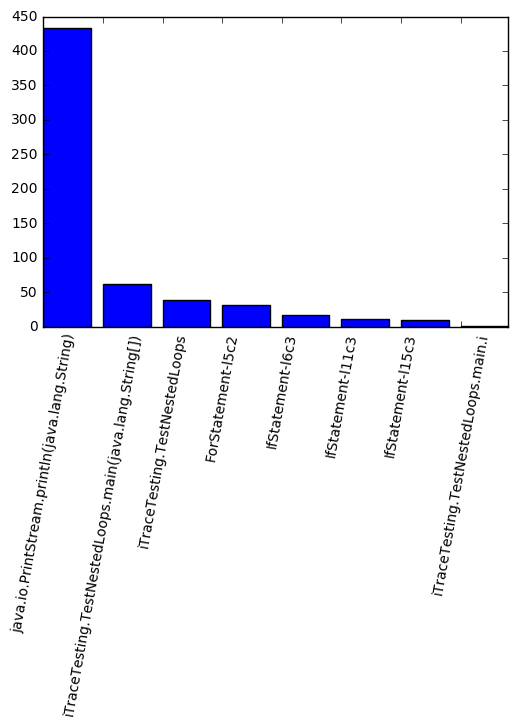

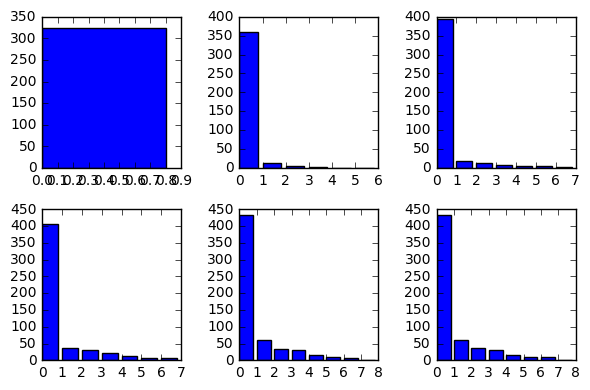

In [157]:
#
#iTrace4.sce_distribution(0,10),
plot_bar(iTrace.sce_distribution())
plot_bar_subplots([iTrace4.sce_distribution(0,10),
iTrace.sce_distribution(0,20),
iTrace.sce_distribution(0,30),
iTrace.sce_distribution(0,40),
iTrace.sce_distribution(0,50),
iTrace.sce_distribution(0,60)])
#plot_bar(iTrace4.sce_distribution(20,50))


In [85]:
df1 = df.drop_duplicates(subset="gaze_id")
x = list(df1["x"])
y = list(df1["y"])

plt.scatter(x,y)

NameError: name 'df' is not defined

In [ ]:
271768846419483/10E9

In [ ]:
27176/60